<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/lecture_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Кейс-стади -2. 

Соревнования из kaggel: **Students Performance in Exams**: предсказание, насколько хорошо сдадут экзамены студенты. 
https://www.kaggle.com/spscientist/students-performance-in-exams

In [0]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import pearsonr
%matplotlib inline

Загружаем данные 

In [2]:
url='http://yustiks.ru/StudentsPerformance.csv'
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Можно увидеть, что результаты экаменов представлены в 3ех параметрах: это math score, reading score и writing score.

* gender - пол
* race/ethnicity - к какой расе принадлежит
* parental level of education - уровень образования родителей
* lunch - обед (какой тип)
* test preparation course - пройден или нет подготовительный курс
* math score - оценки по математике
* reading score - оценки за чтение
* writing score - оценки за письменность 

Посмотрим типы каждой колонки:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Добавим новое значение на основе имеющихся: Total Score или общее количество набранных баллов за все предметы

In [0]:
data['total score'] = data['math score'] + data['reading score'] + data['writing score']

Посмотрим средние значения по результатам:

In [5]:
print("Average math score is    : {}".format(np.mean(data['math score'])))
print("Average reading score is : {}".format(np.mean(data['reading score'])))
print("Average writing score is : {}".format(np.mean(data['writing score'])))
print("Average total score is   : {}".format(np.mean(data['total score'])/3))

Average math score is    : 66.089
Average reading score is : 69.169
Average writing score is : 68.054
Average total score is   : 67.77066666666667


Посмотрим плотность распределения данных в таблице:

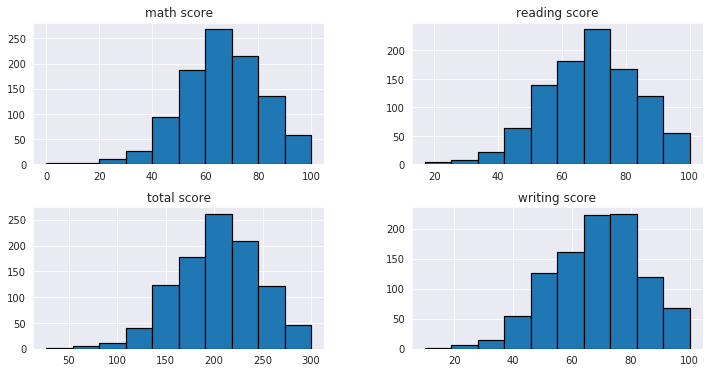

In [6]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

В основном, у всех значений получилось нормальное Гауссово распределение. 

Используя библиотеку seaborn, начертим violinplot или скрипичная диаграмма. 

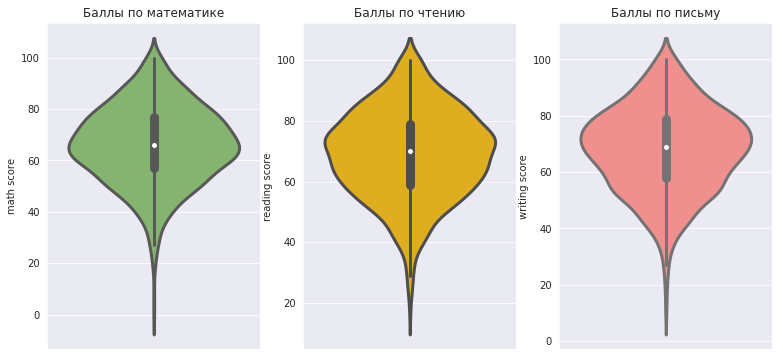

In [7]:
plt.figure(figsize=(13,6))
plt.subplot(1, 3, 1)
plt.title('Баллы по математике')
sns.violinplot(y='math score',data=data,palette='summer',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('Баллы по чтению')
sns.violinplot(y='reading score',data=data,palette='Wistia_r',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('Баллы по письму')
sns.violinplot(y='writing score',data=data,palette='spring',linewidth=3)
plt.show()

По графику можно увидеть, что значения по математике в основном находятся в интервале от 60 до 80, по чтению и письму от 50 до 80. 

Допустим, нам известно, проходные баллы по математике равны 40. Построим графики распределения тех, кто сдал и не сдал математику. 

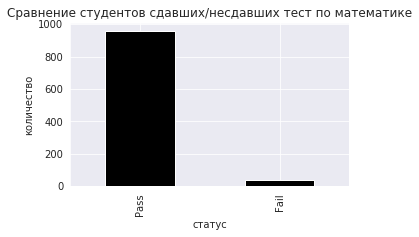

In [8]:
passmarks = 40

# создадим новую колонку
data['pass_math'] = np.where(data['math score']< passmarks, 'Fail', 'Pass')
data['pass_math'].value_counts(dropna = False).plot.bar(color = 'black', figsize = (5, 3))

plt.title('Сравнение студентов сдавших/несдавших тест по математике')
plt.xlabel('статус')
plt.ylabel('количество')
plt.show()

In [9]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,pass_math
0,female,group B,bachelor's degree,standard,none,72,72,74,218,Pass
1,female,group C,some college,standard,completed,69,90,88,247,Pass
2,female,group B,master's degree,standard,none,90,95,93,278,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Pass
4,male,group C,some college,standard,none,76,78,75,229,Pass


График **bar plot**

[960, 40]


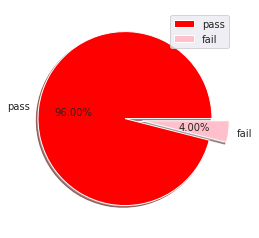

In [10]:
size = list(data['pass_math'].value_counts())
print(size)
colors = ['red', 'pink']
labels = "pass", "fail"
explode = [0, 0.2]

plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.legend()
plt.show()

In [11]:
data['target'] = np.where(data['pass_math']=='Fail', 0, 1)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,pass_math,target
0,female,group B,bachelor's degree,standard,none,72,72,74,218,Pass,1
1,female,group C,some college,standard,completed,69,90,88,247,Pass,1
2,female,group B,master's degree,standard,none,90,95,93,278,Pass,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Pass,1
4,male,group C,some college,standard,none,76,78,75,229,Pass,1


Посмотрим распределение тех, кто прошел **подготовительные курсы**, по полу.

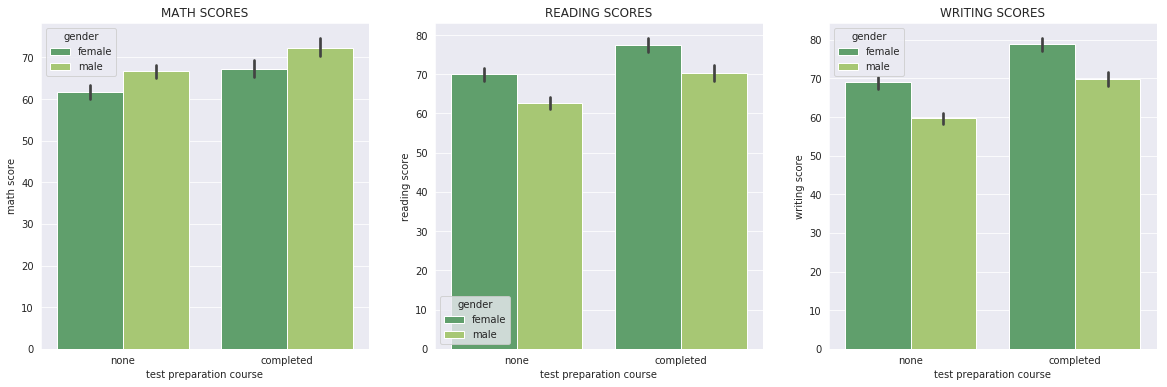

In [12]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=data,hue='gender',palette='summer')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=data,hue='gender',palette='summer')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=data,hue='gender',palette='summer')
plt.title('WRITING SCORES')
plt.show()

Из графика выше мы можем сделать вывод, что по математике оценки у мужчин выше чем у женщин независимо от того, закончил человек подготовительный курс или нет. 
Из двух других графиков мы можем сделать вывод, что женщины в целом лучше сдают чтение и письмо. 
Из трех графиков можно сделать вывод, что если подготовительный курс был завершен, то человек получает оценки выше. 

Посмотрим как соотносятся данные по половому признаку

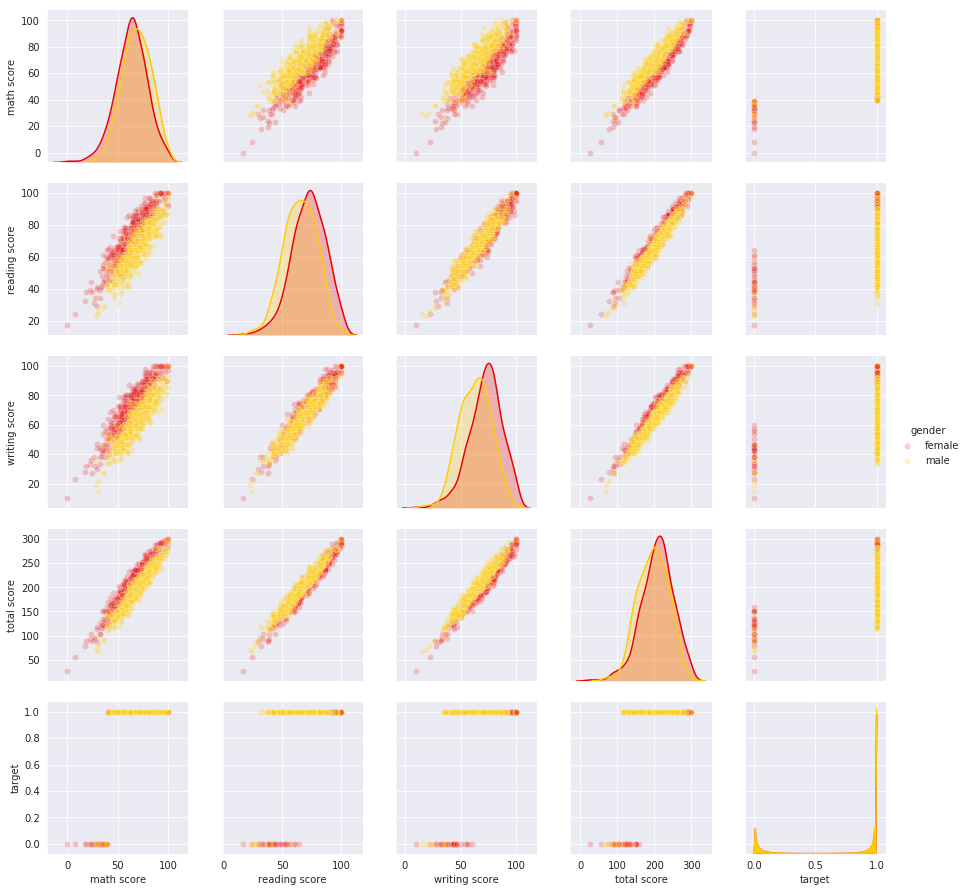

In [13]:
sns.pairplot(data=data,hue='gender',plot_kws={'alpha':0.2},palette='hot')
plt.show()

Из графиков видно, что данные сильно коррелированы, классы хорошо отделяются по математике - чтению, математике - письму. 

Посмотрим что из себя представляет столбик **lunch**

In [14]:
data['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

Посмотрим, как обед влияет на баллы

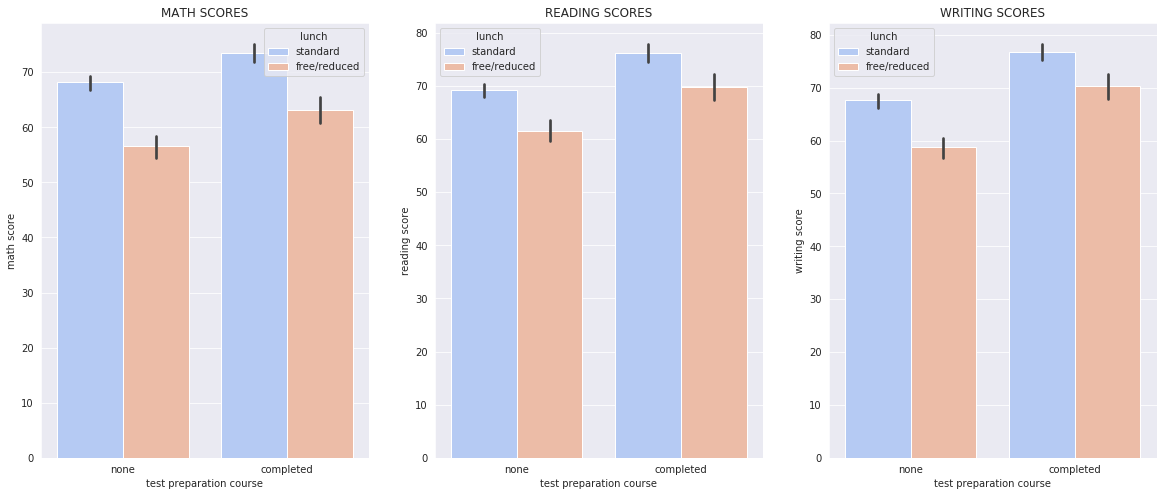

In [15]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=data,hue='lunch',palette='coolwarm')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=data,hue='lunch',palette='coolwarm')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=data,hue='lunch',palette='coolwarm')
plt.title('WRITING SCORES')
plt.show()

В общем и целом, в обоих классах людей, употребляющих стандартный ланч, больше. 

Посмотрим на людей, получивших максимальное количество баллов:

In [16]:
data[(data['math score'] > 90) & (data['reading score'] > 90) & (data['writing score']>90)]\
.sort_values(by=['total score'],ascending=False).head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,pass_math,target
962,female,group E,associate's degree,standard,none,100,100,100,300,Pass,1
458,female,group E,bachelor's degree,standard,none,100,100,100,300,Pass,1
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,Pass,1
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,Pass,1
179,female,group D,some high school,standard,completed,97,100,100,297,Pass,1


Первый двое топовых студенты либо гении, либо приготовили шпаргалки, так как их подготовительные курсы не были завершены. 

Посмотрим распределение оценок по национальности. 

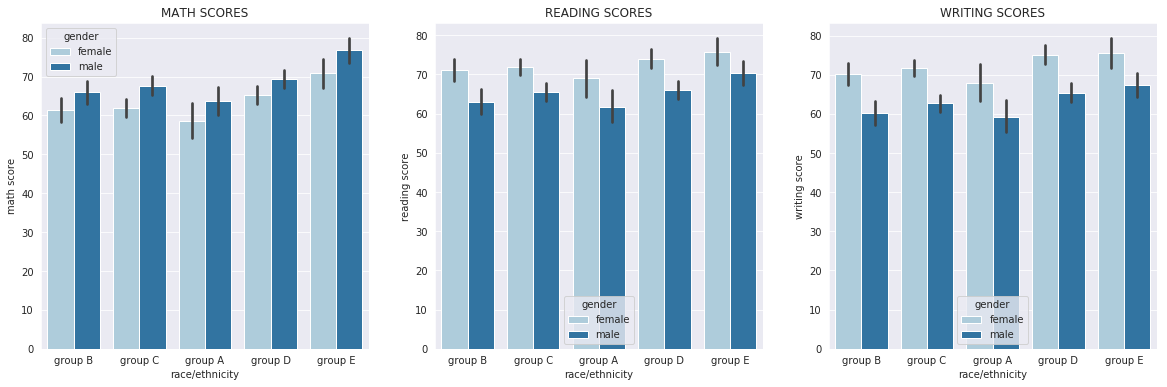

In [17]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.barplot(x='race/ethnicity',y='math score',data=data,hue='gender',palette='Paired')
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.barplot(x='race/ethnicity',y='reading score',data=data,hue='gender',palette='Paired')
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.barplot(x='race/ethnicity',y='writing score',data=data,hue='gender',palette='Paired')
plt.show()

Группа Е имеет самые высокие показатели (больше всего людей в этой группе), причем больше сдавших по всем предметам. 

Посмотрим распределение образования родителей 

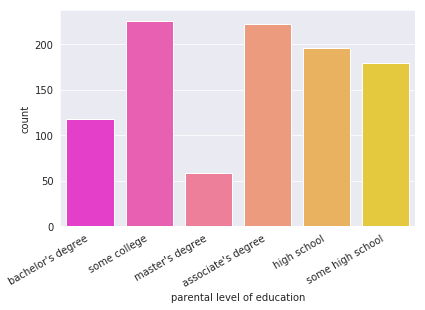

In [18]:
fig,ax=plt.subplots()
sns.countplot(x='parental level of education',data=data,palette='spring')
plt.tight_layout()
fig.autofmt_xdate()

Можно заметить, что в основном родители получили associate's degree или some college, очень мало имеют магистерское образование. 

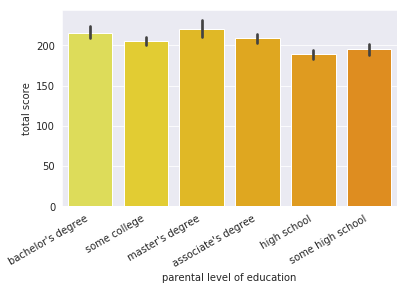

In [19]:
fig,ax=plt.subplots()
sns.barplot(x=data['parental level of education'],y='total score',data=data,palette='Wistia')
fig.autofmt_xdate()

 Можно заметить, что есть студенты, чьи родители получили степень магистра, имеют успеваемость выше, чем остальные. 

# **Линейная регрессия на основе датасета о студентах**

Построим модель линейной регрессии на основе данного датасета. Таргет значение - total score.

In [20]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,pass_math,target
0,female,group B,bachelor's degree,standard,none,72,72,74,218,Pass,1
1,female,group C,some college,standard,completed,69,90,88,247,Pass,1
2,female,group B,master's degree,standard,none,90,95,93,278,Pass,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Pass,1
4,male,group C,some college,standard,none,76,78,75,229,Pass,1


Добавим класс 'sex' на основе 'gender' значеий.

In [21]:
data['sex'] = data['gender']
data.loc[data['gender'] == 'female', 'sex'] = 0
data.loc[data['gender'] == 'male', 'sex'] = 1
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,pass_math,target,sex
0,female,group B,bachelor's degree,standard,none,72,72,74,218,Pass,1,0
1,female,group C,some college,standard,completed,69,90,88,247,Pass,1,0
2,female,group B,master's degree,standard,none,90,95,93,278,Pass,1,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Pass,1,1
4,male,group C,some college,standard,none,76,78,75,229,Pass,1,1


Добавим колонку 'race' на основе колонки 'race/ethnicity'

In [22]:
data['race'] = data['race/ethnicity']
data.loc[data['race/ethnicity'] == 'group A', 'race'] = 0
data.loc[data['race/ethnicity'] == 'group B', 'race'] = 1
data.loc[data['race/ethnicity'] == 'group C', 'race'] = 2
data.loc[data['race/ethnicity'] == 'group D', 'race'] = 3
data.loc[data['race/ethnicity'] == 'group E', 'race'] = 4
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,pass_math,target,sex,race
0,female,group B,bachelor's degree,standard,none,72,72,74,218,Pass,1,0,1
1,female,group C,some college,standard,completed,69,90,88,247,Pass,1,0,2
2,female,group B,master's degree,standard,none,90,95,93,278,Pass,1,0,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Pass,1,1,0
4,male,group C,some college,standard,none,76,78,75,229,Pass,1,1,2


Заменим колонку 'parental level of education' на 'parent'

In [23]:
data['parent'] = data['parental level of education']
data.loc[data['parental level of education'] == 'high school', 'parent'] = 0
data.loc[data['parental level of education'] == 'some high school', 'parent'] = 1
data.loc[data['parental level of education'] == 'some college', 'parent'] = 2
data.loc[data['parental level of education'] == 'bachelor\'s degree', 'parent'] = 3
data.loc[data['parental level of education'] == 'master\'s degree', 'parent'] = 4
data.loc[data['parental level of education'] == 'associate\'s degree', 'parent'] = 5
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,pass_math,target,sex,race,parent
0,female,group B,bachelor's degree,standard,none,72,72,74,218,Pass,1,0,1,3
1,female,group C,some college,standard,completed,69,90,88,247,Pass,1,0,2,2
2,female,group B,master's degree,standard,none,90,95,93,278,Pass,1,0,1,4
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Pass,1,1,0,5
4,male,group C,some college,standard,none,76,78,75,229,Pass,1,1,2,2


Заменим колонку 'lunch' на 'lunch_type'

In [24]:
data['lunch_type'] = data['lunch']
data.loc[data['lunch'] == 'free/reduced', 'lunch_type'] = 0
data.loc[data['lunch'] == 'standard', 'lunch_type'] = 1
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,pass_math,target,sex,race,parent,lunch_type
0,female,group B,bachelor's degree,standard,none,72,72,74,218,Pass,1,0,1,3,1
1,female,group C,some college,standard,completed,69,90,88,247,Pass,1,0,2,2,1
2,female,group B,master's degree,standard,none,90,95,93,278,Pass,1,0,1,4,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Pass,1,1,0,5,0
4,male,group C,some college,standard,none,76,78,75,229,Pass,1,1,2,2,1


Заменим колонку "test preparation course" на "test"

In [25]:
data['test'] = data['test preparation course']
data.loc[data['test preparation course'] == 'none', 'test'] = 0
data.loc[data['test preparation course'] == 'completed', 'test'] = 1
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,pass_math,target,sex,race,parent,lunch_type,test
0,female,group B,bachelor's degree,standard,none,72,72,74,218,Pass,1,0,1,3,1,0
1,female,group C,some college,standard,completed,69,90,88,247,Pass,1,0,2,2,1,1
2,female,group B,master's degree,standard,none,90,95,93,278,Pass,1,0,1,4,1,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Pass,1,1,0,5,0,0
4,male,group C,some college,standard,none,76,78,75,229,Pass,1,1,2,2,1,0


Создадим таблицу X - это вектор тренировочных данных

In [26]:
X = data[['sex',	'race',	'parent',	'lunch_type',	'test']]
X.head()

,sex,race,parent,lunch_type,test
0,0,1,3,1,0
1,0,2,2,1,1
2,0,1,4,1,0
3,1,0,5,0,0
4,1,2,2,1,0


Y - значение таргет

In [0]:
Y = data['total score']

Разделим данные на **тренировочные** и **тестовые** данные (80% тренировочных и 20% тестовых):

In [28]:
from sklearn.model_selection import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

print("Number train dataset: ", len(X_train))
print("Number test dataset: ", len(X_test))
print("Total number: ", len(X_train)+len(X_test))

Number train dataset:  800
Number test dataset:  200
Total number:  1000


Построим линейную регрессию

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Посмотрим **качество модели** на тестовых данных

In [0]:
Y_pred = model.predict(X_test)

Сравним 4 первых элемента Y предсказанное значение и Y истинное

In [31]:
Y_pred[:4]

array([191.09732936, 180.62917599, 184.99624698, 174.31517493])

In [32]:
np.array(y_test)[:4]

array([208, 232, 136, 203])

Посчитаем качество как **сумму абсолютных отклонений от истинных значений**

In [0]:
abs_error = abs(Y_pred - np.array(y_test))

In [34]:
abs_error[:4]

array([16.90267064, 51.37082401, 48.99624698, 28.68482507])

In [35]:
print('сумма абсолютных отклонений равна: ', (sum(abs_error))/len(abs_error))

сумма абсолютных отклонений равна:  31.184056920910624


In [36]:
print('min:', min(Y))
print('max:', max(Y))

min: 27
max: 300


Посчитаем **квадратичную ошибку**

In [37]:
(sum((Y_pred - np.array(y_test))**2)/len(Y_pred))**0.5

38.536122638462714

In [38]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_pred, np.array(y_test))**0.5)

38.53612263846271


In [39]:
print(min(Y))
print(max(Y))

27
300


# Логистическая регрессия

Загрузим датасет ирисов. 

In [40]:
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Мы хотим предсказать к какому классу относится цветок по 4 параметрам. Всего 3 класса. С какой-то вероятностью новый цветок, которого нет в датасете, будет относится к одному из 4ых цветков.

In [41]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [42]:
print(len((iris[iris['species']=='setosa'])))
print(len(iris[iris['species']=='versicolor']))
print(len(iris[iris['species']=='virginica']))

50
50
50


In [0]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X, y = load_iris(return_X_y=True)

Разделим датасет на тренировочные данные и на тестовые данные

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

**Логистическая регрессия** - это разновидность множественной регрессии, общее назначение которой состоит в анализе связи между несколькими независимыми переменными (называемыми также регрессорами или предикторами) и зависимой переменной. Бинарная логистическая регрессия применяется, если зависимая переменная является бинарной (т.е. может принимать только два значения). Иными словами, с помощью логистической регрессии можно оценивать вероятность того, что событие наступит для конкретного испытуемого (больной/здоровый, возврат кредита/дефолт и т.д.).

Все регрессионные модели могут быть записаны в виде формулы:



$$y=F(x_{1},x_{2},..x_{n})$$

В множественной линейной регрессии предполагается, что зависимая переменная является линейной функцией независимых переменных:



Данную регрессию можно использовать для задачи оценки вероятности исхода события, вычислив стандартные коэффициенты регрессии. Например, если рассматривается исход по займу, задается переменная y со значениями 1 и 0, где 1 означает, что соответствующий заемщик расплатился по кредиту, а 0, что имел место дефолт. Возникает проблема: множественная регрессия не учитывает, что переменная отклика бинарна по своей природе. Это приведет к модели с предсказываемыми значениями большими 1 и меньшими 0. Но такие значения вообще не допустимы для первоначальной задачи. Таким образом, множественная регрессия просто игнорирует ограничения на диапазон значений для y.

Для решения проблемы задача регрессии может быть сформулирована иначе: вместо предсказания бинарной переменной, предсказывается непрерывная переменная со значениями на отрезке [0, 1] при любых значениях независимых переменных. Это достигается применением следующего регрессионного уравнения (логит-преобразование):

Логистическая функция $f(x)=\frac{1}{1+e^{-1}}$

![alt text](https://upload.wikimedia.org/wikipedia/commons/a/ac/Logistic-curve.png)

где

*  P. Вероятность того, что произойдет интересующее событие;

*  e. Основание натуральных логарифмов 2,71…;

*  y. Стандартное уравнение регрессии.

Применим логистическую регрессию и посмотрим качество модели на тестовых данных

In [60]:
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_train, y_train)
y_predicted = clf.predict(X_test)
print(y_predicted)
print(y_test)
print(clf.score(X_test, y_test))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
1.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Качество классификационной модели оценивается по таким характеристикам, как **precision** и **recall**. 

Точность (precision) и полнота (recall) являются метриками которые используются при оценке большей части алгоритмов извлечения информации. Иногда они используются сами по себе, иногда в качестве базиса для производных метрик, таких как F-мера или R-Precision.

**Точность системы в пределах класса (precision)** – это доля элементов действительно принадлежащих данному классу относительно всех элементов которые система отнесла к этому классу.

$$precision = \frac{tp}{tp+fp}$$

**Полнота системы (recall)** – это доля найденных классфикатором элементов принадлежащих классу относительно всех элементов этого класса в тестовой выборке.

$$recall = \frac{tp}{tp+fn}$$

**recall** соответственно - это отношение верно предсказанных классов к сумме верных предсказаний и неверных противоположных предсказаний. Recall - вероятность того, что модель найдет всех больных в классе о здоровых и больных людях.

В общем виде это можно проиллюстрировать следующей картинкой:

![alt text](https://hsto.org/webt/cu/4l/2w/cu4l2wliuqbqanpptc1y-rq3scu.png)

В таблице содержится информация сколько раз система приняла верное и сколько раз неверное решение по документам заданного класса. А именно:

*  TP — истино-положительное решение;
*  TN — истино-отрицательное решение;
*  FP — ложно-положительное решение;
*  FN — ложно-отрицательное решение.

*Рассмотрим пример. Допустим, у вас есть тестовая выборка в которой 10 сообщений, из них 4 – спам. Обработав все сообщения классификатор пометил 2 сообщения как спам, причем одно действительно является спамом, а второе было помечено в тестовой выборке как нормальное. Мы имеем одно истино-положительное решение, три ложно-отрицательных и одно ложно-положительное. Тогда для класса “спам” точность классификатора составляет $1/2$ (50% положительных решений правильные), а полнота $1/4$ (классификатор нашел 25% всех спам-сообщений).*

F1-score - среднее между precision и recall, лучшее значение для F1 - это 1, худшее значение - это 0.

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Баесовский метод решения классификационной проблемы.

Лучшим другом аналитика данных является теорема Байеса4, которая позволяет "переставить" условные вероятности местами. Пусть нужно узнать вероятность не коего события E, зависящего от наступления некоего другого события F, причем в наличии имеется лишь информация о вероятности события F, зависящего от наступления события E. Двукратное применение (в силу симметрии) определения условной вероятности даст формулу Байеса:


$$ P(A\mid B) = \frac{P(B\mid A) P(A)}{P(B)}$$

где $P(A\mid B)$ - вероятность наступления события A при условии наличия события B


Если событие B разложить на два взаимоисключающих события B при условии A и B при условии $\bar{E}$, то событие P(B) можно представить как сумма вероятностей наступления событий $P(B\mid A)$ и  $P(B\mid \bar{A})$, тогда формула вероятности примет вид:

$$P(A\mid B) = \frac{P(B\mid A) P(A)}{P(B\mid A)P(A) + P(B\mid \bar{A})P(\bar{A})}$$


Если события независимы:

$$P(A\mid B) = P(A)P(B)$$

Если события зависимы, и при этом вероятность B не равна нулю, то 

$$P(A\mid B) = \frac{P(A, B) }{P(B)}$$


Под этим подразумевается вероятность наступления события A при условии, что известно о наступлении события B.

В случае независимости двух переменных формула принимает вид:

$$P(A\mid B) = P(A)$$


означает, что наличие наступления события B не дает нам никакой информации о наступлении события A

In [62]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (y_pred.shape[0],(y_test != y_pred).sum()))


Number of mislabeled points out of a total 30 points : 0


In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Датасет о кредитных картах

Данный датасет является несбалансированным.

In [48]:
url='http://yustiks.ru/dataset/creditcard.csv'
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [49]:
print('Количество элементов в первом классе: ', len(data[data['Class']==0]))
print('Количество элементов в первом классе: ', len(data[data['Class']==1]))

Количество элементов в первом классе:  284315
Количество элементов в первом классе:  492


Данные несбалансированы. 

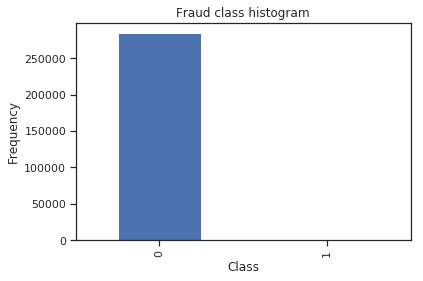

In [50]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

Применим логистическую регрессию для данного датасета.

In [51]:
# разделим датасет на зависимые переменные и таргет значение (X и Y)
y = data.Class
X = data.drop('Class', axis=1)

# разделим на тренировочные данные и на тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)


model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.89      0.59      0.71       132

    accuracy                           1.00     71202
   macro avg       0.94      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202



Тогда для класса “небезопасная транзакция” точность классификатора составляет  0.89  (89% положительных решений правильные), а полнота  0.59 (классификатор нашел 59% всех небезопасных транзакций).

**Метод 1 работы с несбалансированным датасетом: увеличение количества элементов в выборке с меньшим количеством элементов.**

In [52]:
from sklearn.utils import resample

# создадим вектор X как общие данные (X и Y)
X = pd.concat([X_train, y_train], axis=1)

# разделим на 2 класса - fraud и non-fraud
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# генерируем данные для класса с меньшим количеством элементов
fraud_upsampled = resample(fraud,
                          replace=True, # элемент с заменой
                          n_samples=len(not_fraud), # кол-во эл-тов =кол-во эл-ов в бОльшей выборке
                          random_state=27) # выбираем переменную для random

# объединим полученные класс с бОльшей выборкой
upsampled = pd.concat([not_fraud, fraud_upsampled])

# проверим количество классов теперь
upsampled.Class.value_counts()


1    213245
0    213245
Name: Class, dtype: int64

Проверим логистическую регрессию на данном датасете

In [53]:
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

print(classification_report(y_test, upsampled_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71070
           1       0.08      0.87      0.14       132

    accuracy                           0.98     71202
   macro avg       0.54      0.93      0.57     71202
weighted avg       1.00      0.98      0.99     71202



Тогда для класса “небезопасная транзакция” точность классификатора составляет 0.08 (8% положительных решений правильные), а полнота 0.87 (классификатор нашел 87% всех небезопасных транзакций).

**Метод 2 для работы с несбалансированными данными: увеличение количества элементов в выборке с меньшим количестом**

In [54]:
# применяем fraud и not_fraud, которые были посчитаны выше

# уменьшаем выборку в бОльшим количеством элементов
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # без замены
                                n_samples = len(fraud), # количество = кол-во эл-тов в меньшей выборке
                                random_state = 27) # 

# объединим полученные данные с меньшей выборкой
downsampled = pd.concat([not_fraud_downsampled, fraud])

# проверим количество
downsampled.Class.value_counts()

1    360
0    360
Name: Class, dtype: int64

In [55]:
downsampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
52250,45351.0,-1.141460,-0.281136,2.205293,-0.275292,0.327032,-0.267688,0.483675,0.002364,0.268906,-0.760590,-0.656409,-0.219610,-0.547102,-0.379091,0.124314,-0.013306,-0.333953,-0.393318,-1.205134,0.221703,0.237527,0.625389,-0.012922,0.111228,0.133170,0.339626,-0.149373,-0.114898,95.65,0
206609,136280.0,-0.001267,0.114684,-0.175974,-0.028082,0.975494,-1.047153,1.335877,-0.430110,-0.390600,0.004114,0.686652,0.376180,-0.797358,0.469596,-1.284646,-0.635313,-0.339314,-0.065888,0.655695,0.129343,0.154994,0.518047,0.081486,0.106495,-0.466786,0.270228,-0.142407,-0.134988,74.50,0
201719,134010.0,1.974399,-0.532101,-0.374127,0.341453,-0.400506,0.375773,-0.841009,0.141828,1.301195,-0.000988,-1.530263,0.217165,0.629800,-0.391345,0.817768,0.871673,-0.980961,0.311440,-0.109515,-0.065555,-0.008794,0.046465,0.231662,0.047582,-0.420946,0.174599,-0.000914,-0.028766,36.00,0
214205,139577.0,1.968008,0.142945,-1.653114,0.440423,0.233991,-1.146296,0.216385,-0.262941,0.242670,-0.334681,1.565066,1.080263,0.421309,-0.622117,0.182956,0.293263,0.203357,0.817494,-0.255530,-0.137105,0.274764,0.927387,-0.036602,-0.030559,0.208554,-0.124545,-0.002582,-0.036990,19.99,0
10650,17937.0,1.106245,0.312914,0.615679,1.341805,-0.138104,-0.147340,-0.126578,-0.003521,1.012336,-0.183855,2.607881,-1.567323,1.409773,2.029345,-0.247270,-0.026676,0.368995,0.203478,-0.827576,-0.188516,0.020419,0.311769,-0.067228,0.176748,0.510438,-0.321234,0.000587,0.006629,19.99,0


In [56]:
y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

print(classification_report(y_test, undersampled_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71070
           1       0.06      0.86      0.12       132

    accuracy                           0.98     71202
   macro avg       0.53      0.92      0.55     71202
weighted avg       1.00      0.98      0.99     71202



В данном случае уменьшение количества данных в одном классе привело к ухудшению модели.